In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv("heart-disease-UCI.csv")

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


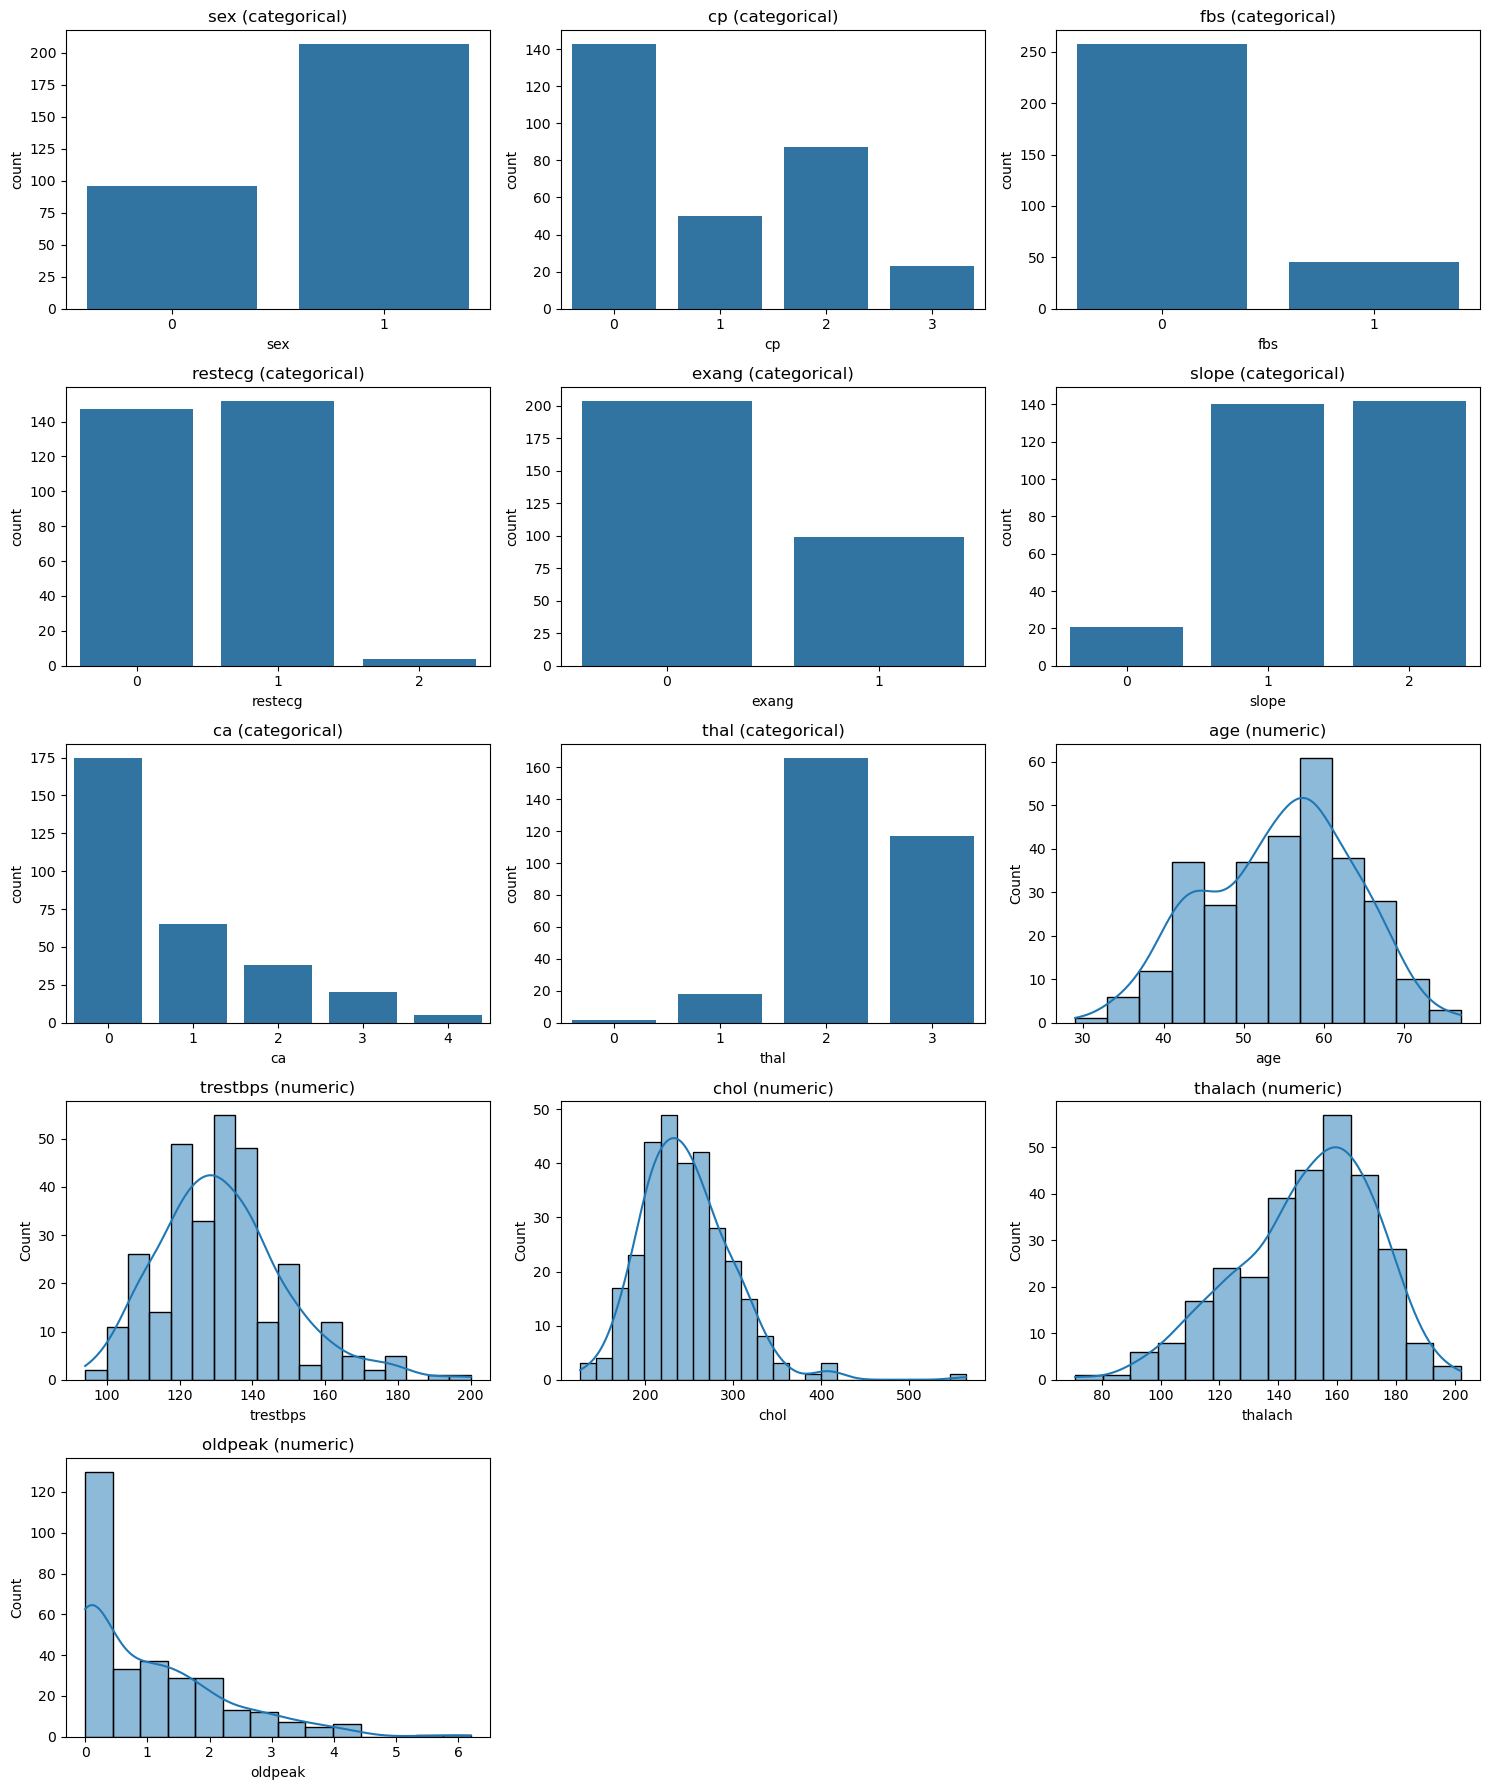

In [4]:
categorical = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]
numeric = ["age", "trestbps", "chol", "thalach", "oldpeak"]

plt.figure(figsize=(15, 18))

for i, col in enumerate(categorical, 1):
    plt.subplot(5, 3, i)
    sns.countplot(x=df[col])
    plt.title(f"{col} (categorical)")

# Plot numeric distributions (hist + KDE)
offset = len(categorical)
for i, col in enumerate(numeric, 1):
    plt.subplot(5, 3, offset + i)
    sns.histplot(df[col], kde=True)
    plt.title(f"{col} (numeric)")

plt.tight_layout()
plt.show()

In [3]:
X = df.drop("target", axis=1)
y = df['target']

In [42]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.25, random_state=42)
                                                    
pd.DataFrame(X_train).to_csv("X_train_pca.csv", index=False)
pd.DataFrame(X_test).to_csv("X_test_pca.csv", index=False)
pd.Series(y_train).to_csv("y_train_pca.csv", index=False)
pd.Series(y_test).to_csv("y_test_pca.csv", index=False)

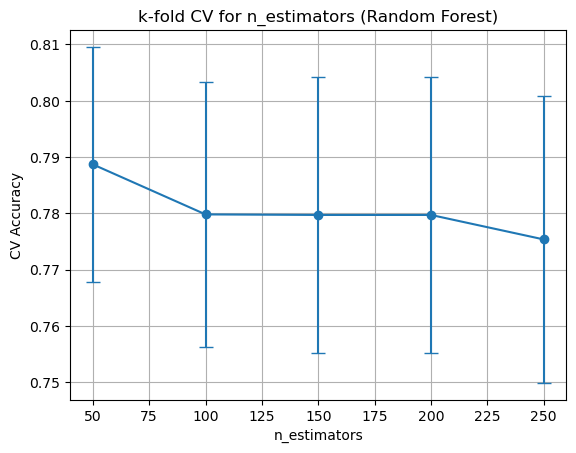

Training time: 0.044036149978637695 seconds
Training accuracy: 1.0
Test accuracy: 0.8026315789473685
Test time: 0.002301931381225586 seconds


In [9]:
param_grid = {
    "n_estimators": [50, 100, 150, 200, 250]
}


grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    return_train_score=True
)

grid.fit(X_train, y_train)

param = grid.cv_results_["param_n_estimators"].data.astype(int)
mean = grid.cv_results_["mean_test_score"]
std = grid.cv_results_["std_test_score"]

plt.errorbar(param, mean, yerr=std, fmt="-o", capsize=5)
plt.xlabel("n_estimators")
plt.ylabel("CV Accuracy")
plt.title("k-fold CV for n_estimators (Random Forest)")
plt.grid(True)
plt.show()

model = RandomForestClassifier(n_estimators=50,random_state=42)
start = time.time()
model.fit(X_train, y_train)
end = time.time()

training_time = end - start
train_acc = model.score(X_train, y_train)

print("Training time:", training_time, "seconds")
print("Training accuracy:", train_acc)

start = time.time()
test_accuracy = model.score(X_test, y_test)
end = time.time()

test_time = end - start

print("Test accuracy:", test_accuracy)
print("Test time:", test_time, "seconds")



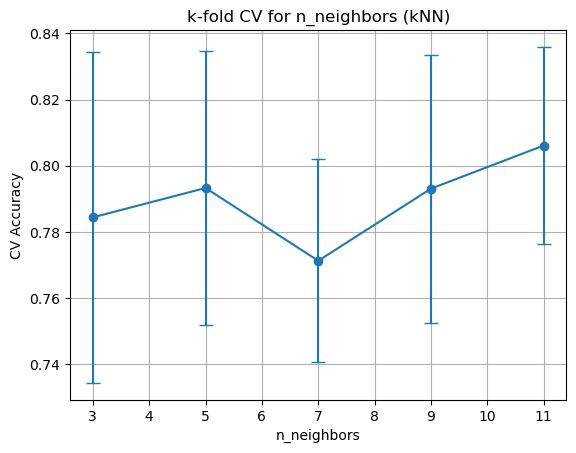

Training time: 0.0004878044128417969 seconds
Training accuracy: 0.8458149779735683
Test time: 0.0013790130615234375 seconds
Test accuracy: 0.881578947368421


In [11]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11]
}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

param = grid_search.cv_results_["param_n_neighbors"].data.astype(int)
mean = grid_search.cv_results_["mean_test_score"]
std = grid_search.cv_results_["std_test_score"]

plt.errorbar(param, mean, yerr=std, fmt="-o", capsize=5)
plt.xlabel("n_neighbors")
plt.ylabel("CV Accuracy")
plt.title("k-fold CV for n_neighbors (kNN)")
plt.grid(True)
plt.show()

model = KNeighborsClassifier(n_neighbors=11)
start = time.time()
model.fit(X_train, y_train)
end = time.time()

training_time = end - start
train_acc = model.score(X_train, y_train)

print("Training time:", training_time, "seconds")
print("Training accuracy:", train_acc)

start = time.time()
test_accuracy = model.score(X_test, y_test)
end = time.time()

test_time = end - start

print("Test time:", test_time, "seconds")
print("Test accuracy:", test_accuracy)



In [12]:
X = df.drop("cp", axis=1)
y = df['cp']

In [5]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

X_train.to_csv('X_train2.csv', index=False)
X_test.to_csv('X_test2.csv', index=False)
y_train.to_csv('y_train2.csv', index=False)
y_test.to_csv('y_test2.csv', index=False)

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.25, random_state=42)
                                                    
pd.DataFrame(X_train).to_csv("X_train_pca2.csv", index=False)
pd.DataFrame(X_test).to_csv("X_test_pca2.csv", index=False)
pd.Series(y_train).to_csv("y_train_pca2.csv", index=False)
pd.Series(y_test).to_csv("y_test_pca2.csv", index=False)

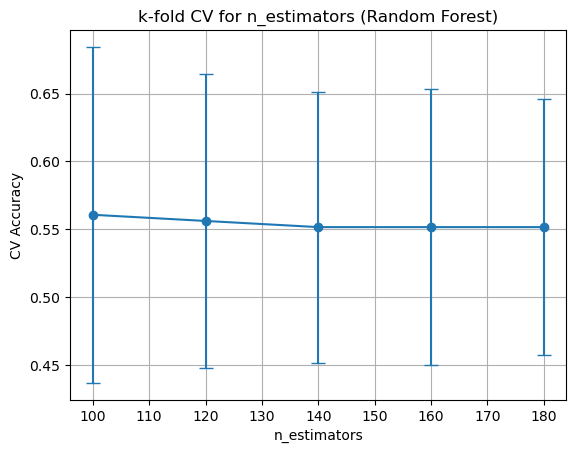

Training time: 0.09154582023620605 seconds
Training accuracy: 1.0
Test time: 0.00379180908203125 seconds
Test accuracy: 0.5263157894736842


In [22]:
param_grid = {
    "n_estimators": [100, 120, 140, 160, 180]
}


grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=10,
    scoring="accuracy",
    return_train_score=True
)

grid.fit(X_train, y_train)

param = grid.cv_results_["param_n_estimators"].data.astype(int)
mean = grid.cv_results_["mean_test_score"]
std = grid.cv_results_["std_test_score"]

plt.errorbar(param, mean, yerr=std, fmt="-o", capsize=5)
plt.xlabel("n_estimators")
plt.ylabel("CV Accuracy")
plt.title("k-fold CV for n_estimators (Random Forest)")
plt.grid(True)
plt.show()

model = RandomForestClassifier(n_estimators=100,random_state=42)
start = time.time()
model.fit(X_train, y_train)
end = time.time()

training_time = end - start
train_acc = model.score(X_train, y_train)

print("Training time:", training_time, "seconds")
print("Training accuracy:", train_acc)

start = time.time()
test_accuracy = model.score(X_test, y_test)
end = time.time()

test_time = end - start

print("Test time:", test_time, "seconds")
print("Test accuracy:", test_accuracy)



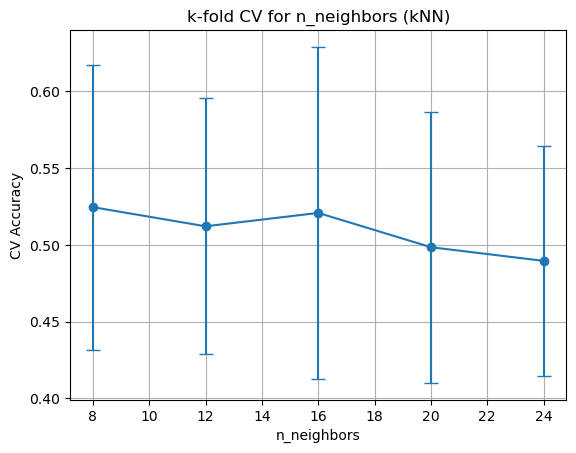

Training time: 0.0005753040313720703 seconds
Training accuracy: 0.6343612334801763
Test time: 0.0012111663818359375 seconds
Test accuracy: 0.5


In [27]:
param_grid = {
    'n_neighbors': [8, 12, 16, 20, 24]
}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

param = grid_search.cv_results_["param_n_neighbors"].data.astype(int)
mean = grid_search.cv_results_["mean_test_score"]
std = grid_search.cv_results_["std_test_score"]

plt.errorbar(param, mean, yerr=std, fmt="-o", capsize=5)
plt.xlabel("n_neighbors")
plt.ylabel("CV Accuracy")
plt.title("k-fold CV for n_neighbors (kNN)")
plt.grid(True)
plt.show()

model = KNeighborsClassifier(n_neighbors=8)
start = time.time()
model.fit(X_train, y_train)
end = time.time()

training_time = end - start
train_acc = model.score(X_train, y_train)

print("Training time:", training_time, "seconds")
print("Training accuracy:", train_acc)

start = time.time()
test_accuracy = model.score(X_test, y_test)
end = time.time()

test_time = end - start

print("Test time:", test_time, "seconds")
print("Test accuracy:", test_accuracy)

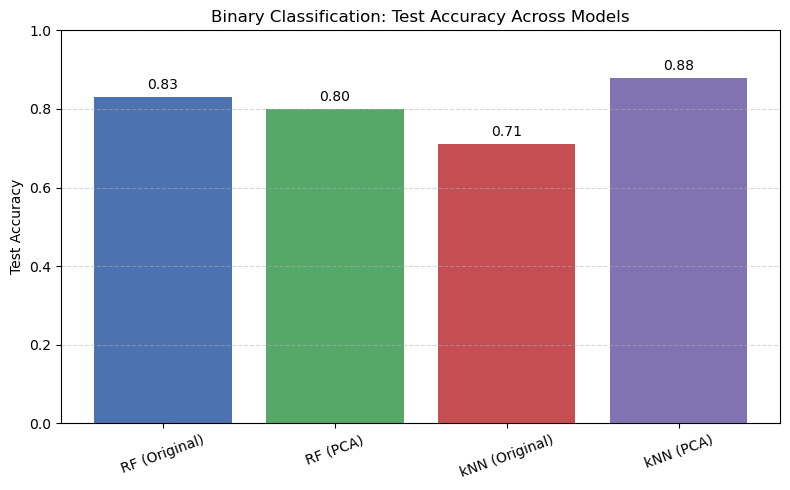

In [5]:
rf_orig = 0.83
rf_pca  = 0.80
knn_orig = 0.71
knn_pca  = 0.88

models = ["RF (Original)", "RF (PCA)", "kNN (Original)", "kNN (PCA)"]
accuracies = [rf_orig, rf_pca, knn_orig, knn_pca]


plt.figure(figsize=(8, 5))
bars = plt.bar(models, accuracies, color=["#4c72b0", "#55a868", "#c44e52", "#8172b2"])

plt.ylim(0, 1.0)
plt.ylabel("Test Accuracy")
plt.title("Binary Classification: Test Accuracy Across Models")

for bar in bars:
    y = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, y + 0.02, f"{y:.2f}", ha='center')

plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

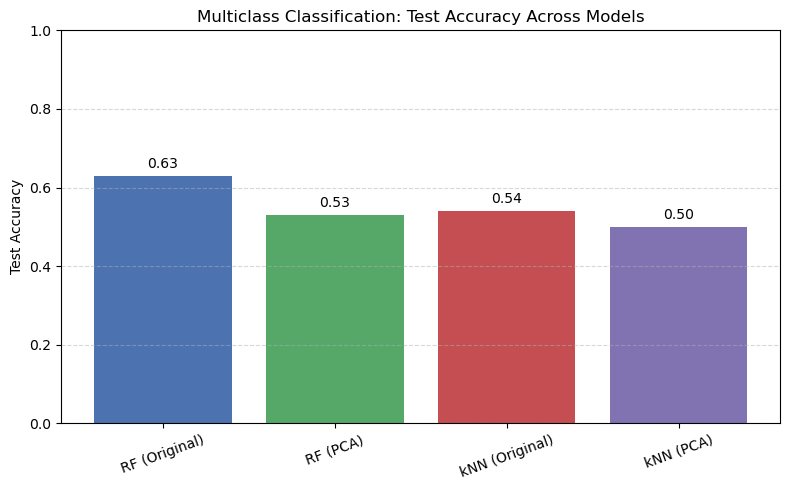

In [6]:
rf_orig_mc = 0.63
rf_pca_mc  = 0.53
knn_orig_mc = 0.54
knn_pca_mc  = 0.50

models_mc = ["RF (Original)", "RF (PCA)", "kNN (Original)", "kNN (PCA)"]
accuracies_mc = [rf_orig_mc, rf_pca_mc, knn_orig_mc, knn_pca_mc]


plt.figure(figsize=(8, 5))
bars_mc = plt.bar(models_mc, accuracies_mc, color=["#4c72b0", "#55a868", "#c44e52", "#8172b2"])

plt.ylim(0, 1.0)
plt.ylabel("Test Accuracy")
plt.title("Multiclass Classification: Test Accuracy Across Models")

for bar in bars_mc:
    y = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, y + 0.02, f"{y:.2f}", ha='center')

plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
